In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
from dateutil.parser import parse

In [6]:
prices = pd.read_csv('../input/crypto-markets.csv')

**object type series** is not appropriate since we want to do time-dependent operations. There is still a need to use a specific column as date.

In [14]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
prices = pd.read_csv('../input/crypto-markets.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)

#this can also be done easier:
#dm = pd.read_csv('../input/crypto-markets.csv')
#dm['date'] = pd.to_datetime(dm['date'])

In [17]:
prices.dtypes

open         float64
high         float64
low          float64
close        float64
volume       float64
market       float64
coin          object
aud_open     float64
aud_close    float64
variance     float64
dtype: object

In [18]:
prices.head()

,open,high,low,close,volume,market,coin,aud_open,aud_close,variance
date,,,,,,,,,,
2015-09-15,0.0,0.0,0.0,0.0,8.0,4133.0,020LondonCoin (020),0.0,0.0,0.00000
2015-09-16,0.0,0.0,0.0,0.0,1.0,4150.0,020LondonCoin (020),0.0,0.0,0.09677
2015-09-17,0.0,0.0,0.0,0.0,0.0,4542.0,020LondonCoin (020),0.0,0.0,0.40385
2015-09-18,0.0,0.0,0.0,0.0,5.0,7574.0,020LondonCoin (020),0.0,0.0,0.11864
2015-09-19,0.0,0.0,0.0,0.0,1.0,8732.0,020LondonCoin (020),0.0,0.0,-1.00000


In [90]:
btc = prices[prices['coin'] == 'Bitcoin (BTC)']
ltc = prices[prices['coin'] == 'Litecoin (LTC)']
btc.head()

,open,high,low,close,volume,market,coin,aud_open,aud_close,variance
date,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,NaN,1.500520e+09,Bitcoin (BTC),169.26030,167.89671,-0.00812
2013-04-29,134.44,147.49,134.00,144.54,NaN,1.491160e+09,Bitcoin (BTC),168.18444,180.81954,0.06988
2013-04-30,144.00,146.93,134.05,139.00,NaN,1.597780e+09,Bitcoin (BTC),180.14400,173.88900,-0.03597
2013-05-01,139.00,139.89,107.72,116.99,NaN,1.542820e+09,Bitcoin (BTC),173.88900,146.35449,-0.18814
2013-05-02,116.38,125.60,92.28,105.21,NaN,1.292190e+09,Bitcoin (BTC),145.59138,131.61771,-0.10617


(array([ 735020.,  735203.,  735385.,  735568.,  735750.,  735933.,
         736116.,  736299.,  736481.]), <a list of 9 Text xticklabel objects>)

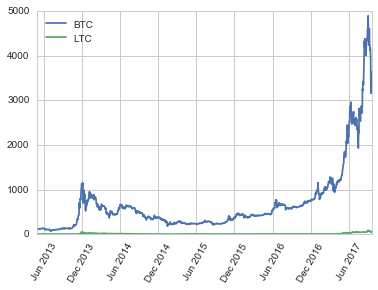

In [53]:
plt.plot(btc['close'], label='BTC')
plt.plot(ltc['close'], label='LTC')

plt.legend(loc = 'upper left')
plt.xticks(rotation=60)

In [91]:
btc_first = btc.loc[:,('close')][0]
btc['btc_index'] = btc.loc[:,'close'] / btc_first

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [92]:
ltc_first = ltc.loc[:,('close')][0]
ltc['ltc_index'] = ltc.loc[:,'close'] / ltc_first

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
btc_first, ltc_first

(134.21000000000001, 4.3499999999999996)

(array([ 735020.,  735203.,  735385.,  735568.,  735750.,  735933.,
         736116.,  736299.,  736481.]), <a list of 9 Text xticklabel objects>)

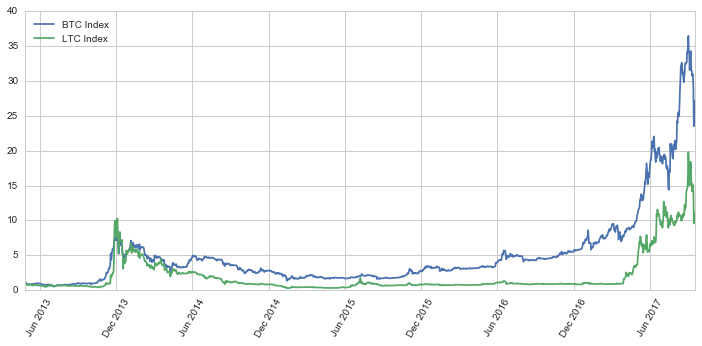

In [202]:
plt.figure(figsize=(12,5))
plt.plot(btc['btc_index'], label='BTC Index')
plt.plot(ltc['ltc_index'], label='LTC Index')

plt.legend(loc = 'upper left')
plt.xticks(rotation=60)

#### Returns and other stuff

In [93]:
btc['log_return'] = np.log(btc.loc[:,('close')]).diff()
ltc['log_return'] = np.log(ltc.loc[:,('close')]).diff()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


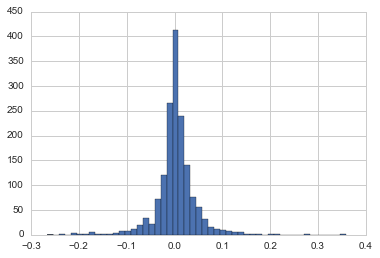

In [71]:
btc['log_return'].hist(bins=50)

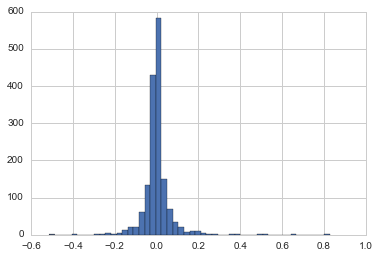

In [74]:
ltc['log_return'].hist(bins=50)

In [100]:
btc['volatility'] = btc['log_return'].rolling(window=30).std()
ltc['volatility'] = ltc['log_return'].rolling(window=30).std()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [103]:
btc['ann_volatility'] = btc['volatility'] * np.sqrt(252)
ltc['ann_volatility'] = ltc['volatility'] * np.sqrt(252)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(array([ 735081.,  735265.,  735446.,  735630.,  735811.,  735995.,
         736177.,  736361.,  736542.]), <a list of 9 Text xticklabel objects>)

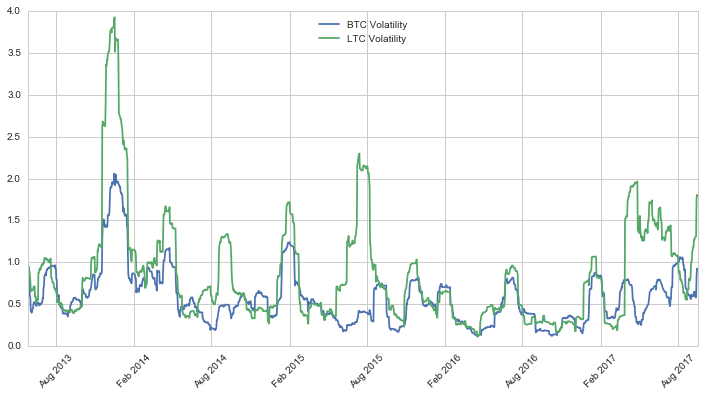

In [114]:
plt.figure(figsize=(12,6))
plt.plot(btc['ann_volatility'], label='BTC Volatility')
plt.plot(ltc['ann_volatility'], label='LTC Volatility')

plt.legend(loc = 'upper center')
plt.xticks(rotation=45)

#### Correlations

In [115]:
rolling_corr = btc.log_return.rolling(window=30).corr(other=ltc.log_return)

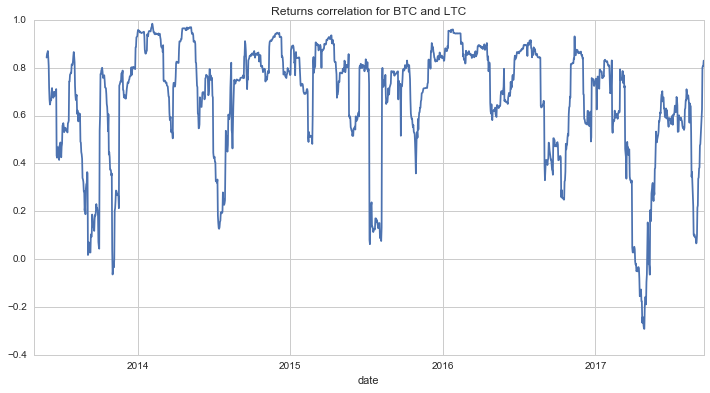

In [120]:
rolling_corr.plot(title='Returns correlation for BTC and LTC',
                  figsize=(12,6))

In [129]:
corr = np.corrcoef(btc.log_return.dropna(), ltc.log_return.dropna())
corr = corr[0][1]
corr

0.65078978481232097

### Value-at-Risk and Expected Shortfall

In [197]:
# Calculate VaR and ES for BTC
btc_VaR = btc.log_return.quantile(0.05)
btc_ES = btc['log_return'][btc['log_return'] < btc_VaR].mean()

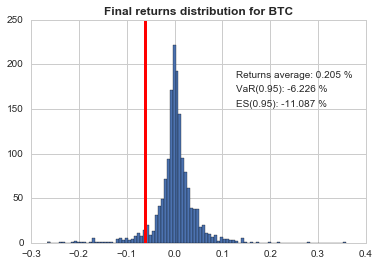

In [199]:
ret = btc.log_return.dropna()
# Now let's plot the distribution of the end prices
plt.hist(ret,bins=100)

# Using plt.figtext to fill in some additional information onto the plot

# Mean ending price
plt.figtext(0.6, 0.7, "Returns average: %.3f %%" % (ret.mean()*100))

# Variance of the price (within 95% confidence interval)
plt.figtext(0.6, 0.65, "VaR(0.95): %.3f %%" % (btc_VaR*100))

# Expected shortfall
plt.figtext(0.6, 0.6, "ES(0.95): %.3f %%" % (btc_ES*100))

# Plot a line at the 1% quantile result
plt.axvline(x=btc_VaR, linewidth=3, color='r')

# Title
plt.title("Final returns distribution for BTC", weight='bold');